# Code Example from Time Series Talk: Autocorrelation (ACF) and Partial Autocorrelation (PACF)

In [10]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

## Ice Cream Production Data

### Parsing and Preprocessing

In [3]:
# Read data as CSV
df_ice_cream = pd.read_csv('data/ice_cream.csv')

In [4]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [5]:
# Rename columns
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [6]:
df_ice_cream['date']  = pd.to_datetime(df_ice_cream['date'])

In [7]:
df_ice_cream.set_index('date', inplace=True)

In [9]:
# Just take data from 2010 on
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

### Visualization

ParserError: month must be in 1..12: 201301-01

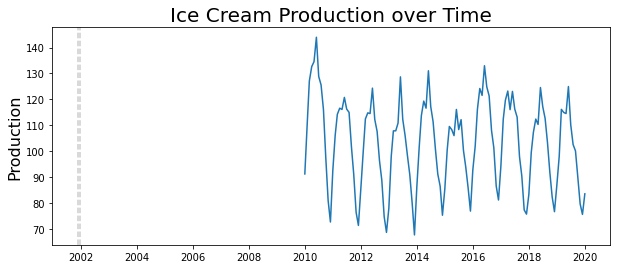

In [12]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)